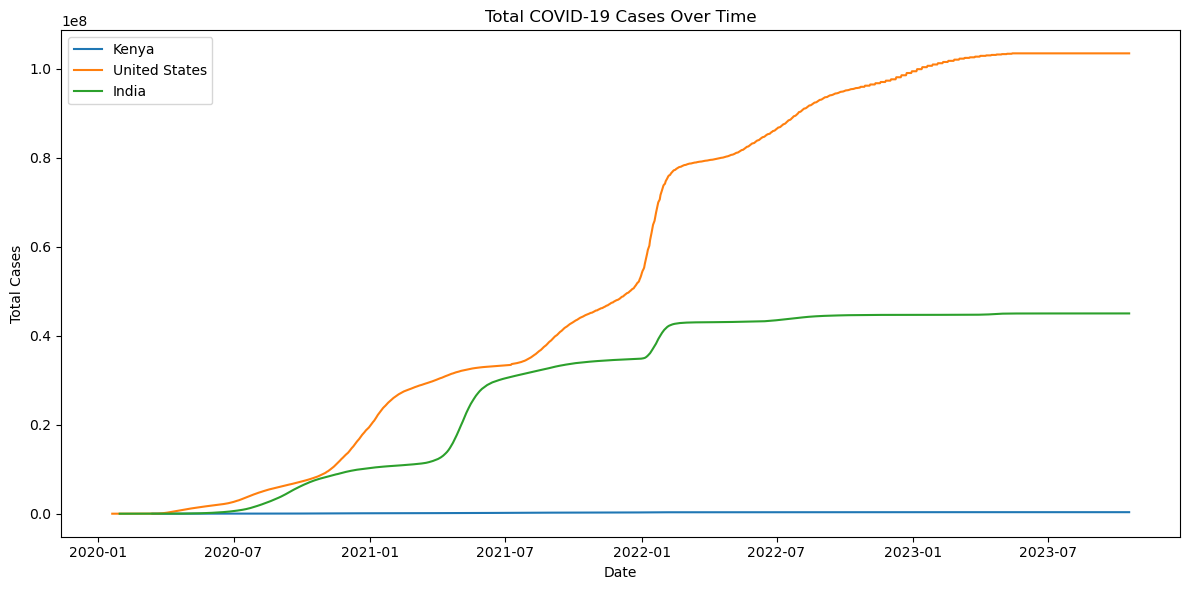

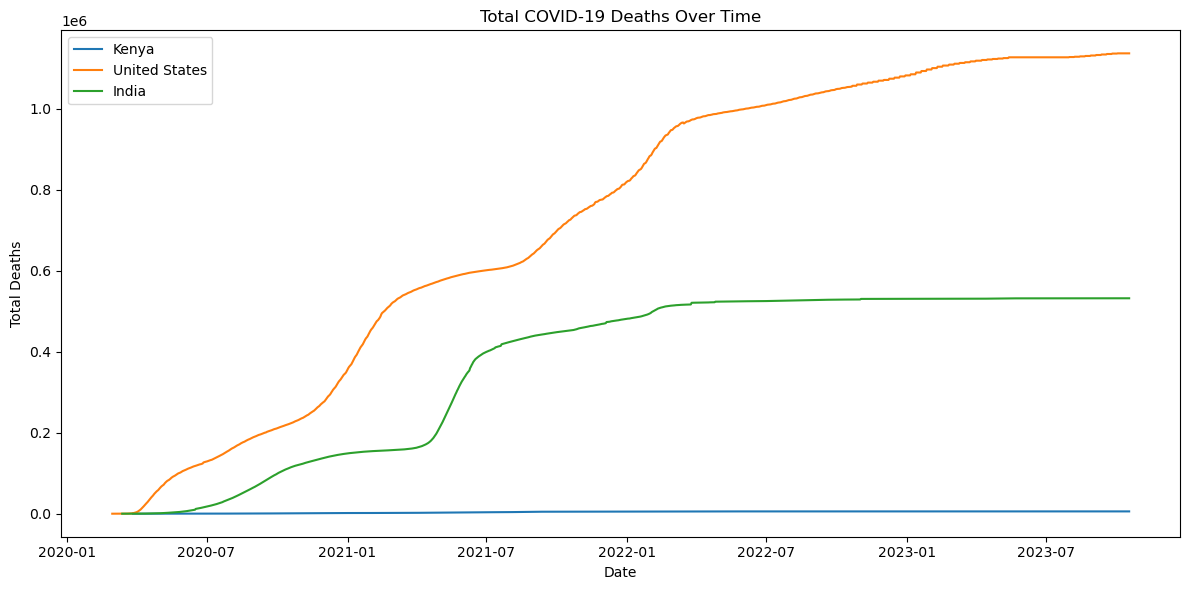

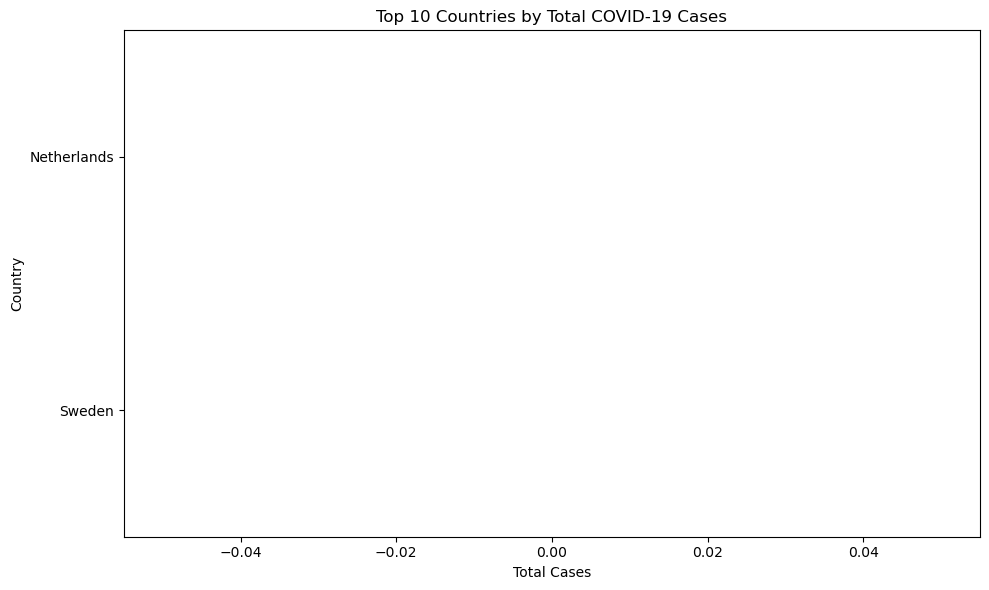

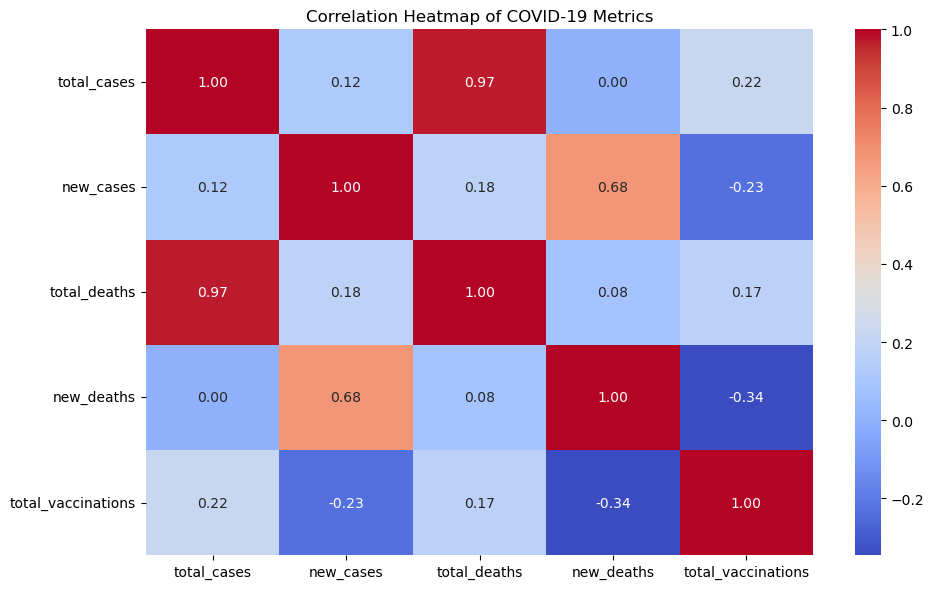

In [8]:
# COVID-19 Global Data Tracker with Visualizations
# This script analyzes global COVID-19 trends using the OWID dataset.
# It includes line charts, bar charts, and a heatmap.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Step 1: Load Dataset
file_path = "owid-covid-data.csv"

if not os.path.exists(file_path):
    print(f"File '{file_path}' not found. Please place it in the same folder as this script.")
    exit()

# Step 2: Read and Clean Data
df = pd.read_csv(file_path)
df['date'] = pd.to_datetime(df['date'])

# Keep only country-level data (3-letter ISO codes)
df = df[df['iso_code'].str.len() == 3]

# Select relevant columns
df = df[['date', 'location', 'iso_code', 'total_cases', 'new_cases', 'total_deaths',
         'new_deaths', 'total_vaccinations', 'people_vaccinated',
         'people_fully_vaccinated', 'population']]

# Step 3: Line Charts for Selected Countries
countries = ['Kenya', 'United States', 'India']
df_selected = df[df['location'].isin(countries)].copy()

# Line Chart: Total Cases Over Time
plt.figure(figsize=(12, 6))
for country in countries:
    data = df_selected[df_selected['location'] == country]
    plt.plot(data['date'], data['total_cases'], label=country)
plt.title("Total COVID-19 Cases Over Time")
plt.xlabel("Date")
plt.ylabel("Total Cases")
plt.legend()
plt.tight_layout()
plt.show()

# Line Chart: Total Deaths Over Time
plt.figure(figsize=(12, 6))
for country in countries:
    data = df_selected[df_selected['location'] == country]
    plt.plot(data['date'], data['total_deaths'], label=country)
plt.title("Total COVID-19 Deaths Over Time")
plt.xlabel("Date")
plt.ylabel("Total Deaths")
plt.legend()
plt.tight_layout()
plt.show()

# Step 4: Bar Chart for Top Countries
latest_date = df['date'].max()
latest_df = df[df['date'] == latest_date]

top_countries = latest_df.nlargest(10, 'total_cases')[['location', 'total_cases']]

plt.figure(figsize=(10, 6))
sns.barplot(data=top_countries, x='total_cases', y='location', palette='viridis')
plt.title("Top 10 Countries by Total COVID-19 Cases")
plt.xlabel("Total Cases")
plt.ylabel("Country")
plt.tight_layout()
plt.show()

# Step 5: Correlation Heatmap (for selected countries only)
heatmap_data = df_selected[['total_cases', 'new_cases', 'total_deaths', 'new_deaths', 'total_vaccinations']].dropna()

plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of COVID-19 Metrics")
plt.tight_layout()
plt.show()